[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...


Summary Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std    

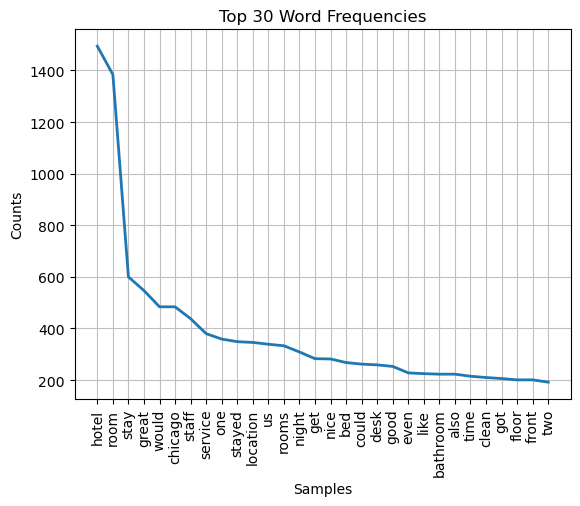

Sentiment Analysis of First Review: {'neg': 0.019, 'neu': 0.837, 'pos': 0.144, 'compound': 0.9297}
                                                text  compound
0  We stayed for a one night getaway with family ...    0.9297
1  Triple A rate with upgrade to view room was le...    0.8883
2  This comes a little late as I'm finally catchi...    0.9442
3  The Omni Chicago really delivers on all fronts...    0.9564
4  I asked for a high floor away from the elevato...    0.9609
Updated hotel reviews saved to 'hotel_reviews_with_compound.csv'.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
import string
import matplotlib.pyplot as plt
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# -----------------------------------------------
# Predictive Modeling: BostonHousing.csv
# -----------------------------------------------

# 1. Read the BostonHousing.csv dataset
boston_data = pd.read_csv("BostonHousing.csv")

# 2. Summary statistics for each column
print("Summary Statistics:")
print(boston_data.describe())

# 3. Create dependent and independent arrays
X = boston_data.drop(columns=['MEDV'])
y = boston_data['MEDV']

# 4. Split data into training (60%) and validation (40%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# 5. Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Assess model performance
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Training MSE: {mse_train}, Validation MSE: {mse_val}")
print(f"Training R2: {r2_train}, Validation R2: {r2_val}")

# -----------------------------------------------
# Text Analysis: hotel-reviews.csv
# -----------------------------------------------

# 7. Read the hotel-reviews.csv dataset
hotel_data = pd.read_csv("hotel-reviews.csv")

# 8. Combine all reviews into one string
text = " ".join(hotel_data['text'])

# 9. Tokenize the text
tokens = word_tokenize(text)

# 10. Refine the text: Remove non-letters, stopwords, and convert to lowercase
stop_words = set(stopwords.words('english'))
refined_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# 11. Count the number of occurrences of each word
freq_dist = FreqDist(refined_tokens)
print("Most Common Words:", freq_dist.most_common(30))

# 12. Display a word frequency line chart (first 30 words)
freq_dist.plot(30, title="Top 30 Word Frequencies")

# 13. Sentiment analysis using VADER on the first review
sia = SentimentIntensityAnalyzer()
first_review_sentiment = sia.polarity_scores(hotel_data['text'][0])
print("Sentiment Analysis of First Review:", first_review_sentiment)

# 14. Define a function to calculate compound score
def compound_score(text):
    return sia.polarity_scores(text)['compound']

# 15. Create a new column for compound scores
hotel_data['compound'] = hotel_data['text'].apply(compound_score)

# Display the updated dataframe
print(hotel_data[['text', 'compound']].head())

# Save the updated DataFrame as a new CSV file
hotel_data.to_csv("hotel_reviews_with_compound.csv", index=False)
print("Updated hotel reviews saved to 'hotel_reviews_with_compound.csv'.")
